# Áí∞Â¢ÉË®≠ÂÆöËàáËºâÂÖ•ÂáΩÂºèÂ∫´

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ÂÆâË£ùÈÅãË°åÊ≠§Á≠ÜË®òÊú¨ÂèØËÉΩÈúÄË¶ÅÁöÑÈ°çÂ§ñÂáΩÂºèÂ∫´
# Â¶ÇÊûúÊÇ®ÊòØÁ¨¨‰∏ÄÊ¨°‰ΩøÁî®ÔºåË´ãÂèñÊ∂à‰ª•‰∏ãÈÄôË°åÁöÑË®ªËß£‰∏¶Âü∑Ë°å
# !pip install emoji textstat

import emoji
import textstat

# --- Ë¶ñË¶∫ÂåñË®≠ÂÆö ---
# Ë®≠ÂÆö seaborn ÁöÑÁπ™ÂúñÈ¢®Ê†º
sns.set_style('whitegrid')
# Ëß£Ê±∫ Matplotlib ‰∏≠ÊñáÈ°ØÁ§∫ÂïèÈ°å
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Heiti TC', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False
# Ë®≠ÂÆö pandas È°ØÁ§∫ÈÅ∏È†Ö
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 150)

print("ÂáΩÂºèÂ∫´ËºâÂÖ•ÂÆåÊàêÔºÅ")

ÂáΩÂºèÂ∫´ËºâÂÖ•ÂÆåÊàêÔºÅ


# ËºâÂÖ•Ë≥áÊñôËàáÂü∫Á§éÈ†êËôïÁêÜ

In [2]:
# --- ËºâÂÖ•Ë≥áÊñô ---
try:
    df = pd.read_csv('train.csv')
    print("train.csv ËºâÂÖ•ÊàêÂäüÔºÅ")
except FileNotFoundError:
    print("ÈåØË™§ÔºöË´ãÁ¢∫Ë™ç 'train.csv' Ê™îÊ°àËàáÊ≠§Á≠ÜË®òÊú¨Âú®Âêå‰∏ÄÂÄãË≥áÊñôÂ§æ‰∏ãÔºÅ")
    # Â¶ÇÊûúÂú® ColabÔºå‰Ω†ÈúÄË¶Å‰∏äÂÇ≥Ê™îÊ°à

# --- Âü∫Á§éÈ†êËôïÁêÜ ---
# 1. ÂâµÂª∫‰∏ÄÂÄãÁµ±‰∏ÄÁöÑ 'label' Ê¨Ñ‰ΩçÔºåÊñπ‰æøÂæåÁ∫åÂàÜÊûê
#    0: model_a Âãù, 1: model_b Âãù, 2: Âπ≥Êâã
def get_label(row):
    if row['winner_model_a'] == 1:
        return 0
    if row['winner_model_b'] == 1:
        return 1
    return 2

df['label'] = df.apply(get_label, axis=1)

# 2. (ÂèØÈÅ∏) Ê∏ÖÁêÜ prompt/response Ê¨Ñ‰Ωç‰∏≠ÂèØËÉΩÂ≠òÂú®ÁöÑÂ§öÈ§òÂºïËôüÊàñÁ©∫Ê†º
for col in ['prompt', 'response_a', 'response_b']:
    # Á¢∫‰øùÊâÄÊúâÂÖßÂÆπÈÉΩÊòØÂ≠ó‰∏≤È°ûÂûãÔºåÈÅøÂÖçÂæåÁ∫åËôïÁêÜÂá∫ÈåØ
    df[col] = df[col].astype(str).str.strip()

# --- È°ØÁ§∫Ë≥áÊñôÊ¶ÇË¶Ω ---
print("\nË≥áÊñôÂâç 3 Á≠Ü:")
print(df.head(3))

print("\nLabel (ÁõÆÊ®ôËÆäÊï∏) ÂàÜ‰Ωà:")
# ‰ΩøÁî® normalize=True ÂèØ‰ª•ÁúãÂà∞ÁôæÂàÜÊØî
print(df['label'].value_counts(normalize=True).map('{:.2%}'.format))

train.csv ËºâÂÖ•ÊàêÂäüÔºÅ

Ë≥áÊñôÂâç 3 Á≠Ü:
      id             model_a         model_b                                             prompt                                         response_a  \
0  30192  gpt-4-1106-preview      gpt-4-0613  ["Is it morally right to try to have a certain...  ["The question of whether it is morally right ...   
1  53567           koala-13b      gpt-4-0613  ["What is the difference between marriage lice...  ["A marriage license is a legal document that ...   
2  65089  gpt-3.5-turbo-0613  mistral-medium  ["explain function calling. how would you call...  ["Function calling is the process of invoking ...   

                                          response_b  winner_model_a  winner_model_b  winner_tie  label  
0  ["As an AI, I don't have personal beliefs or o...               1               0           0      0  
1  ["A marriage license and a marriage certificat...               0               1           0      1  
2  ["Function calling is the process 

# Ë™øÊü•È†ÖÁõÆ 1 - ÂõûÊáâÁöÑÈï∑Â∫¶

--- ÂêÑÈ°ûÂà•‰∏ãÁöÑÂπ≥ÂùáÂõûÊáâÈï∑Â∫¶ ---
        len_a   len_b
label                
0      1567.6  1314.1
1      1291.3  1569.1
2      1259.2  1265.1


C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\321905276.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\321905276.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])


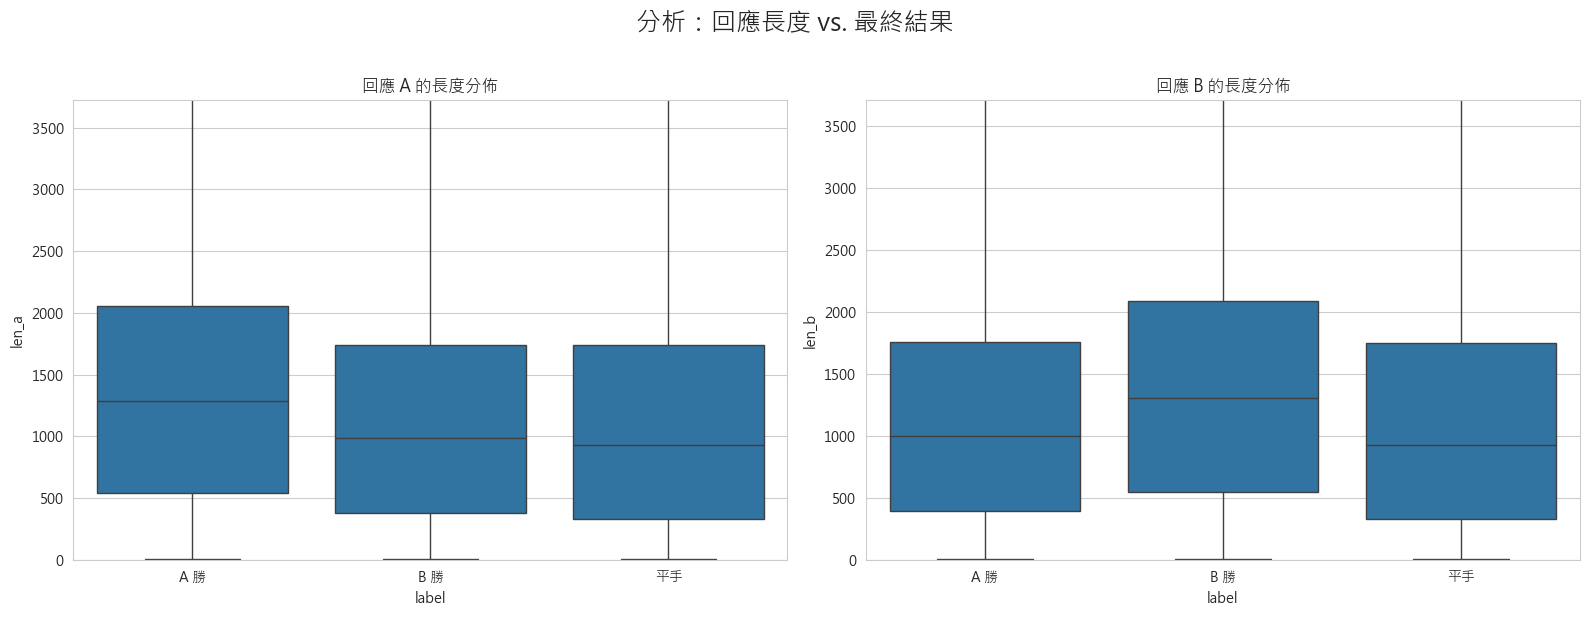


ÂàùÊ≠•ÁµêË´ñÔºö
ÂæûÂúñ‰∏≠ÂèØ‰ª•ËßÄÂØüÂà∞‰∏ÄÂÄãÊòéÈ°ØË∂®Âã¢Ôºö
- Áï∂ A Âãù (label=0) ÊôÇÔºåÂõûÊáâ A ÁöÑÈï∑Â∫¶‰∏≠‰ΩçÊï∏È°ØËëóÈ´òÊñºÂõûÊáâ B„ÄÇ
- Áï∂ B Âãù (label=1) ÊôÇÔºåÂõûÊáâ B ÁöÑÈï∑Â∫¶‰∏≠‰ΩçÊï∏È°ØËëóÈ´òÊñºÂõûÊáâ A„ÄÇ
ÈÄôË°®Êòé„ÄåÈï∑Â∫¶„ÄçÊòØ‰∏ÄÂÄãÈùûÂ∏∏ÊúâÊΩõÂäõÁöÑÁâπÂæµÔºÅ


In [3]:
# --- ÁâπÂæµÂ∑•Á®ã: Èï∑Â∫¶Áõ∏Èóú ---
df['len_a'] = df['response_a'].str.len()
df['len_b'] = df['response_b'].str.len()
df['len_diff'] = abs(df['len_a'] - df['len_b'])

# --- Êï∏ÊìöÂàÜÊûê ---
print("--- ÂêÑÈ°ûÂà•‰∏ãÁöÑÂπ≥ÂùáÂõûÊáâÈï∑Â∫¶ ---")
print(df.groupby('label')[['len_a', 'len_b']].mean().round(1))

# --- Ë¶ñË¶∫ÂåñÂàÜÊûê ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('ÂàÜÊûêÔºöÂõûÊáâÈï∑Â∫¶ vs. ÊúÄÁµÇÁµêÊûú', fontsize=18, y=1.02)

# ‰ΩøÁî®ÁÆ±ÂΩ¢Âúñ (Box Plot) ‰æÜËßÄÂØüÂàÜ‰ΩàÔºåÂÆÉÊØîÂπ≥ÂùáÊï∏Êèê‰æõÊõ¥Â§öË≥áË®ä (‰∏≠‰ΩçÊï∏„ÄÅÈõ¢Áæ§ÂÄºÁ≠â)
sns.boxplot(x='label', y='len_a', data=df, ax=axes[0])
axes[0].set_title('ÂõûÊáâ A ÁöÑÈï∑Â∫¶ÂàÜ‰Ωà')
axes[0].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
# Áî±ÊñºÊúâ‰∫õÂõûÊáâÈùûÂ∏∏Èï∑ÔºåÈÄôË£°ÈôêÂà∂ Y Ëª∏ÁØÑÂúç‰ª•Âà©ÊñºËßÄÂØü‰∏ªË¶ÅÂàÜ‰Ωà
axes[0].set_ylim(0, df['len_a'].quantile(0.95))

sns.boxplot(x='label', y='len_b', data=df, ax=axes[1])
axes[1].set_title('ÂõûÊáâ B ÁöÑÈï∑Â∫¶ÂàÜ‰Ωà')
axes[1].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
axes[1].set_ylim(0, df['len_b'].quantile(0.95))

plt.tight_layout()
plt.show()

print("\nÂàùÊ≠•ÁµêË´ñÔºö\nÂæûÂúñ‰∏≠ÂèØ‰ª•ËßÄÂØüÂà∞‰∏ÄÂÄãÊòéÈ°ØË∂®Âã¢Ôºö\n"
      "- Áï∂ A Âãù (label=0) ÊôÇÔºåÂõûÊáâ A ÁöÑÈï∑Â∫¶‰∏≠‰ΩçÊï∏È°ØËëóÈ´òÊñºÂõûÊáâ B„ÄÇ\n"
      "- Áï∂ B Âãù (label=1) ÊôÇÔºåÂõûÊáâ B ÁöÑÈï∑Â∫¶‰∏≠‰ΩçÊï∏È°ØËëóÈ´òÊñºÂõûÊáâ A„ÄÇ\n"
      "ÈÄôË°®Êòé„ÄåÈï∑Â∫¶„ÄçÊòØ‰∏ÄÂÄãÈùûÂ∏∏ÊúâÊΩõÂäõÁöÑÁâπÂæµÔºÅ")

# ÊΩõÂäõÁâπÂæµ

In [ ]:
# --- ÁâπÂæµÂ∑•Á®ã: ÈÄ≤ÈöéÁâπÂæµ ---

# 1. ËàáÂïèÈ°åÁöÑË≤ºÂêàÂ∫¶ (Jaccard Similarity)
def get_jaccard_similarity(text1, text2):
    set1 = set(str(text1).lower().split())
    set2 = set(str(text2).lower().split())
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

df['jaccard_a'] = df.apply(lambda row: get_jaccard_similarity(row['prompt'], row['response_a']), axis=1)
df['jaccard_b'] = df.apply(lambda row: get_jaccard_similarity(row['prompt'], row['response_b']), axis=1)

# 2. ÁµêÊßãÂåñÁâπÂæµ (Á®ãÂºèÁ¢ºÂçÄÂ°ä & ÂàóË°®È†ÖÁõÆ)
def count_code_blocks(text):
    # Ë®àÁÆó markdown Ê†ºÂºèÁöÑÁ®ãÂºèÁ¢ºÂçÄÂ°äÊï∏Èáè
    return str(text).count('```') // 2

def count_list_items(text):
    # Ë®àÁÆó markdown Ê†ºÂºèÁöÑÂàóË°®Êï∏Èáè (*, -, 1.)
    return len(re.findall(r'^\s*[\*\-]\s|\n\s*[\*\-]\s|^\s*\d+\.\s|\n\s*\d+\.\s', str(text), re.MULTILINE))

df['code_a'] = df['response_a'].apply(count_code_blocks)
df['code_b'] = df['response_b'].apply(count_code_blocks)
df['list_a'] = df['response_a'].apply(count_list_items)
df['list_b'] = df['response_b'].apply(count_list_items)

# 3. ÂèØËÆÄÊÄßÂàÜÊï∏ (Flesch Reading Ease)
# ÂàÜÊï∏Ë∂äÈ´ò‰ª£Ë°®Ë∂äÂÆπÊòìÈñ±ËÆÄ„ÄÇ90-100: Â∞èÂ≠∏ÁîüÊ∞¥Âπ≥, 60-70: Ê®ôÊ∫ñ, 0-30: Â§ßÂ≠∏Á†îÁ©∂ÁîüÊ∞¥Âπ≥
def calculate_readability(text):
    # textstat Â∞çÊñºÁ©∫Â≠ó‰∏≤ÊàñÊ•µÁü≠ÊñáÊú¨ÊúÉÂ†±ÈåØÔºåÈÄôË£°ÂÅöÂÄã‰øùË≠∑
    if not text or len(text.split()) < 5:
        return -1 # ‰ΩøÁî®‰∏ÄÂÄãÁâπÊÆäÂÄº‰æÜÊ®ôË®òÁÑ°ÊïàÂàÜÊï∏
    return textstat.flesch_reading_ease(str(text))

df['readability_a'] = df['response_a'].apply(calculate_readability)
df['readability_b'] = df['response_b'].apply(calculate_readability)

print("ÈÄ≤ÈöéÁâπÂæµÂ∑≤ÁîüÊàêÔºÅÂåÖÂê´Ôºö'jaccard', 'code', 'list', 'readability'")
print("\nÁâπÂæµÈ†êË¶Ω:")
print(df[['jaccard_a', 'code_a', 'list_a', 'readability_a', 'jaccard_b', 'code_b', 'list_b', 'readability_b']].head())

# ÂàÜÊûêÈÄ≤ÈöéÁâπÂæµ

In [ ]:
# --- Ë¶ñË¶∫ÂåñÂàÜÊûêÈÄ≤ÈöéÁâπÂæµ ---
features_to_analyze = {
    'jaccard': 'Jaccard Áõ∏‰ººÂ∫¶ (ËàáÂïèÈ°å)',
    'code': 'Á®ãÂºèÁ¢ºÂçÄÂ°äÊï∏Èáè',
    'list': 'ÂàóË°®È†ÖÁõÆÊï∏Èáè',
    'readability': 'ÂèØËÆÄÊÄßÂàÜÊï∏ (Ë∂äÈ´òË∂äÁ∞°ÂñÆ)'
}

for key, name in features_to_analyze.items():
    # ÂâµÂª∫‰∏ÄÂÄã 1x2 ÁöÑÂ≠êÂúñÁ∂≤Ê†ºÔºåaxes ÊòØ‰∏ÄÂÄãÂåÖÂê´ÂÖ©ÂÄãÂ≠êÂúñÁöÑÈô£Âàó
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Ë®≠ÁΩÆÊï¥ÂÄãÂ§ßÂúñÁöÑÊ®ôÈ°å
    fig.suptitle(f'ÂàÜÊûêÔºö{name} vs. ÊúÄÁµÇÁµêÊûú', fontsize=16)

    # --- Áπ™Ë£ΩÂ∑¶ÈÇäÁöÑÂúñ (ÂõûÊáâ A) ---
    # ÊåáÂÆöË¶ÅÁï´Âú®Á¨¨‰∏ÄÂÄãÂ≠êÂúñ‰∏äÔºöax=axes[0]
    sns.boxplot(x='label', y=f'{key}_a', data=df, ax=axes[0])
    # Â∞çÁ¨¨‰∏ÄÂÄãÂ≠êÂúñÈÄ≤Ë°åË®≠ÂÆö
    axes[0].set_title(f'ÂõûÊáâ A ÁöÑ {name}')
    axes[0].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
    axes[0].set_xlabel('ÊúÄÁµÇÁµêÊûú') # Âä†‰∏ä X Ëª∏Ê®ôÁ±§
    axes[0].set_ylabel(name)      # Âä†‰∏ä Y Ëª∏Ê®ôÁ±§

    # --- Áπ™Ë£ΩÂè≥ÈÇäÁöÑÂúñ (ÂõûÊáâ B) ---
    # ÊåáÂÆöË¶ÅÁï´Âú®Á¨¨‰∫åÂÄãÂ≠êÂúñ‰∏äÔºöax=axes[1]
    sns.boxplot(x='label', y=f'{key}_b', data=df, ax=axes[1])
    # Â∞çÁ¨¨‰∫åÂÄãÂ≠êÂúñÈÄ≤Ë°åË®≠ÂÆö
    axes[1].set_title(f'ÂõûÊáâ B ÁöÑ {name}')
    axes[1].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
    axes[1].set_xlabel('ÊúÄÁµÇÁµêÊûú')
    axes[1].set_ylabel('') # Âè≥ÂúñÂèØ‰ª•ÁúÅÁï• Y Ëª∏Ê®ôÁ±§ÔºåËÆìÁï´Èù¢Êõ¥Á∞°ÊΩî
    # ËÆìÂ∑¶Âè≥ÂÖ©ÂúñÁöÑ Y Ëª∏ÂàªÂ∫¶‰∏ÄËá¥ÔºåÊñπ‰æøÊØîËºÉ
    axes[1].sharey(axes[0])


    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ë™øÊï¥‰ΩàÂ±Ä‰ª•ÂÆπÁ¥çÂ§ßÊ®ôÈ°å
    plt.show()

    # --- Êï∏ÊìöÊëòË¶ÅÈÉ®ÂàÜÁ∂≠ÊåÅ‰∏çËÆä ---
    print(f"--- {name} Êï∏ÊìöÊëòË¶Å (Âπ≥ÂùáÂÄº) ---")
    print(df.groupby('label')[[f'{key}_a', f'{key}_b']].mean().round(3))
    print("-" * 60 + "\n")

# Ë™ûË®ÄÊ∏¨Ë©¶

In [ ]:
# --- 1. Áí∞Â¢ÉË®≠ÂÆöËàáÂÆâË£ù ---
# Â¶ÇÊûúÊÇ®ÊòØÁ¨¨‰∏ÄÊ¨°‰ΩøÁî®ÔºåË´ãÂèñÊ∂à‰ª•‰∏ãÈÄôË°åÁöÑË®ªËß£‰∏¶Âü∑Ë°å‰æÜÂÆâË£ùÂøÖË¶ÅÁöÑÂáΩÂºèÂ∫´
# !pip install langdetect tqdm pyarrow

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect, LangDetectException
from tqdm.auto import tqdm
import os

# --- ÂÆöÁæ©ÂÑ≤Â≠òÁµêÊûúÁöÑÊ™îÊ°àÂêçÁ®± ---
# ÊàëÂÄëÂ∞áÊääÂ∏∂ÊúâË™ûË®ÄÊ®ôÁ±§ÁöÑË≥áÊñôÂÑ≤Â≠òËµ∑‰æÜÔºåÊñπ‰æøÊú™‰æÜ‰ΩøÁî®
output_filename = 'train_with_language.parquet'

# --- 2. Ê™¢Êü•ÊòØÂê¶Â∑≤ÊúâÂàÜÊûêÁµêÊûúÔºåËã•ÁÑ°ÂâáÈñãÂßãÂàÜÊûê ---
if os.path.exists(output_filename):
    print(f"ÁôºÁèæÂ∑≤Â≠òÂú®ÁöÑÂàÜÊûêÁµêÊûúÊ™îÊ°à '{output_filename}'ÔºåÊ≠£Âú®Áõ¥Êé•ËºâÂÖ•...")
    df = pd.read_parquet(output_filename)
    print("Â∑≤ÊàêÂäüËºâÂÖ•ÂÖàÂâçÂàÜÊûêÁöÑË≥áÊñôÔºÅ")
else:
    print(f"Êú™ÁôºÁèæÂàÜÊûêÁµêÊûúÔºåÂ∞áÈñãÂßãÂ∞çÂÆåÊï¥ÁöÑ train.csv ÈÄ≤Ë°åË™ûË®ÄÂÅµÊ∏¨„ÄÇ")
    print("‚ö†Ô∏è ÈÄôÂÄãÈÅéÁ®ãÂèØËÉΩÈúÄË¶Å 5-20 ÂàÜÈêòÔºåË´ãËÄêÂøÉÁ≠âÂÄô...")
    
    # --- ËºâÂÖ•ÂÆåÊï¥Ë≥áÊñô ---
    try:
        df = pd.read_csv('train.csv')
        print(f"train.csv ËºâÂÖ•ÊàêÂäüÔºÅÁ∏ΩÂÖ±Êúâ {len(df)} Á≠ÜË≥áÊñô„ÄÇ")
    except FileNotFoundError:
        print("ÈåØË™§ÔºöË´ãÁ¢∫Ë™ç 'train.csv' Ê™îÊ°àËàáÊ≠§Á≠ÜË®òÊú¨Âú®Âêå‰∏ÄÂÄãË≥áÊñôÂ§æ‰∏ãÔºÅ")
        df = pd.DataFrame() # ÂâµÂª∫‰∏ÄÂÄãÁ©∫ÁöÑ DataFrame ‰ª•ÂÖçÂæåÁ∫åÂá∫ÈåØ

    # --- 3. ÂÆöÁæ©Ë™ûË®ÄÂÅµÊ∏¨ÂáΩÂºè (ÂåÖÂê´ÈåØË™§ËôïÁêÜ) ---
    def detect_language(text):
        try:
            if not isinstance(text, str) or len(text) < 20:
                return 'short_or_invalid'
            return detect(text)
        except LangDetectException:
            return 'unknown'

    # --- 4. Â∞çÂÆåÊï¥Ë≥áÊñôÈõÜÊáâÁî®ÂáΩÂºè‰∏¶È°ØÁ§∫ÈÄ≤Â∫¶Ê¢ù ---
    if not df.empty:
        tqdm.pandas(desc="ÂÅµÊ∏¨Ë™ûË®Ä‰∏≠ (Ë´ãÂñùÊùØÂíñÂï°‚òïÔ∏è)...")
        # <-- ÈáçË¶ÅËÆäÊõ¥ÔºöÁõ¥Êé•Âú®ÂÆåÊï¥ÁöÑ DataFrame 'df' ‰∏äÊìç‰Ωú
        df['language'] = df['response_a'].progress_apply(detect_language)

        # --- 5. „ÄêÈáçË¶ÅÊ≠•È©ü„ÄëÂÑ≤Â≠òÂàÜÊûêÁµêÊûúÔºÅ---
        print(f"\nË™ûË®ÄÂÅµÊ∏¨ÂÆåÊàêÔºÅÊ≠£Âú®Â∞áÁµêÊûúÂÑ≤Â≠òËá≥ '{output_filename}' ‰ª•‰æõÊú™‰æÜÂø´ÈÄü‰ΩøÁî®...")
        # ‰ΩøÁî® Parquet Ê†ºÂºèÂÑ≤Â≠òÔºåÂÆÉÊØî CSV Êõ¥Âø´„ÄÅÊõ¥Â∞è
        df.to_parquet(output_filename, index=False)
        print("ÂÑ≤Â≠òÊàêÂäüÔºÅ‰∏ãÊ¨°Âü∑Ë°åÊ≠§Á≠ÜË®òÊú¨Â∞áÊúÉÁõ¥Êé•ËºâÂÖ•ÔºåÁÑ°ÈúÄÈáçÊñ∞ÂÅµÊ∏¨„ÄÇ")

# --- 6. ÂàÜÊûêËàáË¶ñË¶∫ÂåñÁµêÊûú (ÁÑ°Ë´ñÊòØÊñ∞ÂàÜÊûêÁöÑÈÇÑÊòØËºâÂÖ•ÁöÑ) ---
if 'language' in df.columns:
    lang_counts = df['language'].value_counts()
    
    top_n = 20 # Êó¢ÁÑ∂ÊòØÂÆåÊï¥Ë≥áÊñôÔºåÊàëÂÄëÂèØ‰ª•È°ØÁ§∫Êõ¥Â§öË™ûË®Ä
    top_lang_counts = lang_counts.head(top_n)
    
    print(f"\n--- Ë®ìÁ∑¥ÈõÜ‰∏≠Ââç {top_n} Á®ÆË™ûË®ÄÂàÜ‰Ωà (Âü∫ÊñºÂÆåÊï¥ {len(df)} Á≠ÜË≥áÊñô) ---")
    print(top_lang_counts)

    plt.figure(figsize=(20, 10))
    sns.barplot(x=top_lang_counts.index, y=top_lang_counts.values, palette='viridis')
    
    plt.title(f'Ë®ìÁ∑¥ÈõÜ‰∏≠Ââç {top_n} Á®ÆË™ûË®ÄÁöÑÊï∏ÈáèÂàÜ‰Ωà (Âü∫ÊñºÂÆåÊï¥ {len(df)} Á≠ÜË≥áÊñô)', fontsize=20)
    plt.xlabel('Ë™ûË®Ä‰ª£Á¢º (ISO 639-1)', fontsize=14)
    plt.ylabel('Ê®£Êú¨Êï∏Èáè', fontsize=14)
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()

    # --- 7. Ëß£ËÆÄËàáÁµêË´ñ ---
    if not top_lang_counts.empty and top_lang_counts.index[0] == 'en':
        en_percentage = (top_lang_counts.iloc[0] / len(df)) * 100
        other_lang_count = len(lang_counts) - 1
        print(f"\nÊúÄÁµÇÁµêË´ñÔºö\n"
              f"1. Êï∏ÊìöÈõÜ‰ª•Ëã±Êñá ('en') ÁÇ∫ÁµïÂ∞ç‰∏ªÂ∞éÔºå‰ΩîÊØîÈ´òÈÅî {en_percentage:.2f}%„ÄÇ\n"
              f"2. ÊàëÂÄëÁ∏ΩÂÖ±ÂÅµÊ∏¨Âà∞‰∫Ü {other_lang_count} Á®ÆÂÖ∂‰ªñË™ûË®ÄÔºåË≠âÂØ¶‰∫ÜÈÄôÊòØ‰∏ÄÂÄã**Â§öË™ûË®ÄÊ∑∑Âêà**ÁöÑË≥áÊñôÈõÜ„ÄÇ\n"
              f"3. ÁÇ∫‰∫ÜÁ¢∫‰øùÊ®°ÂûãÂú®ËôïÁêÜÈùûËã±ÊñáË≥áÊñôÊôÇ‰∏çÊúÉÂõ†ÈåØË™§ÁöÑÁâπÂæµËÄåÈôç‰ΩéÊÄßËÉΩÔºå\n"
              f"   Â†ÖÊåÅ‰ΩøÁî®„ÄåË™ûË®ÄÁÑ°Èóú„ÄçÁöÑÁâπÂæµÂ∑•Á®ãÁ≠ñÁï•ÊòØÂÆåÂÖ®Ê≠£Á¢∫‰∏îÂøÖË¶ÅÁöÑ„ÄÇ")
else:
    print("\nÂõ†ÁÑ°Ê≥ïËºâÂÖ•Ë≥áÊñôÊàñÂÅµÊ∏¨Â§±ÊïóÔºåÂàÜÊûêÂ∑≤Ë∑≥ÈÅé„ÄÇ")

# Êñ∞ÁâπÂæµÊé¢Á¥¢


--- Ê™¢Êü•‰∏¶Ë®àÁÆóÊâÄÊúâÈúÄË¶ÅÁöÑÁâπÂæµ ---

--- ÊâÄÊúâÁâπÂæµÂ∑≤Ê∫ñÂÇôÂ∞±Á∑íÔºåÈñãÂßãÂàÜÊûêËàáË¶ñË¶∫Âåñ ---


C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\990922716.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\990922716.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])


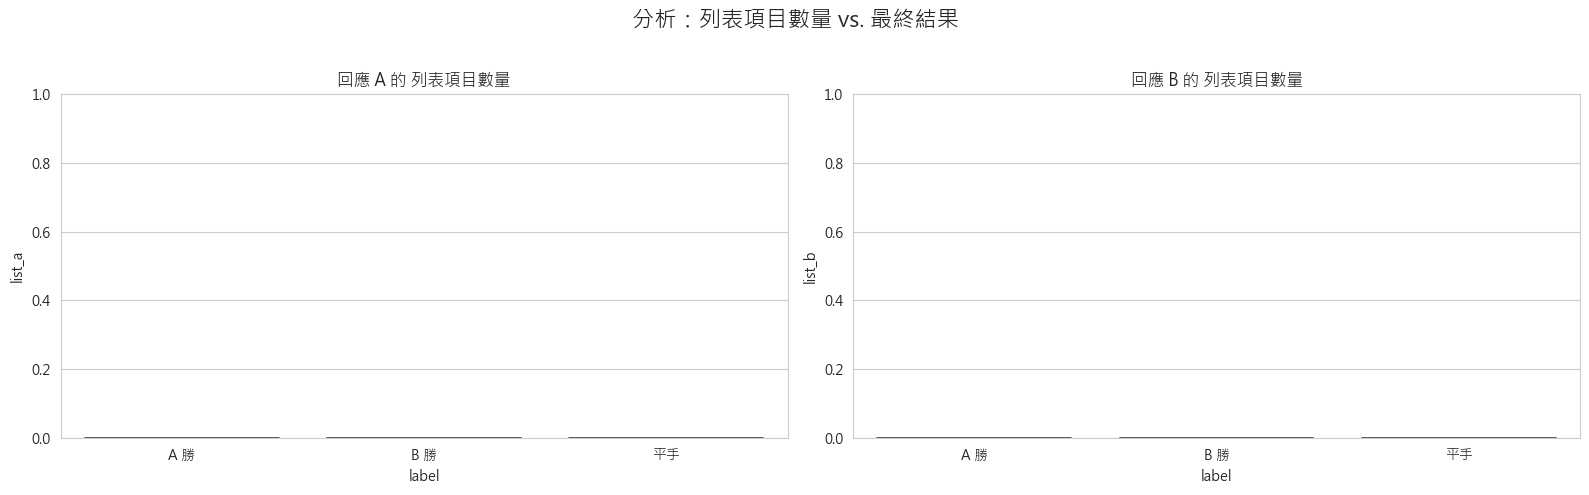

--- Êï∏Â≠óÁµ±Ë®àÔºöÂàóË°®È†ÖÁõÆÊï∏Èáè ---
Ë™™ÊòéÔºöÊÇ®‰πãÂâçÁúãÂà∞ÁöÑ„ÄéÈªûÈªû„ÄèÊòØÊï∏Êìö‰∏≠ÁöÑÈõ¢Áæ§ÂÄº(Outliers)„ÄÇ‰∏ãÈù¢ÁöÑÁµ±Ë®àË°®‰∏≠Ôºå'mean' (Âπ≥ÂùáÊï∏) ÂÆπÊòìÂèóÈõ¢Áæ§ÂÄºÂΩ±ÈüøÔºå
ËÄå '50%' (‰∏≠‰ΩçÊï∏) ÂâáÊõ¥ËÉΩ‰ª£Ë°®Êï∏ÊìöÁöÑÊôÆÈÅçÊÉÖÊ≥Å„ÄÇË´ãÈáçÈªûÊØîËºÉ‰∏çÂêå label ‰∏ãÁöÑ‰∏≠‰ΩçÊï∏Â∑ÆÁï∞„ÄÇ
        list_a                                      list_b                                   
         count mean  std  min  25%  50%  75%  max    count mean  std  min  25%  50%  75%  max
label                                                                                        
0      20064.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  20064.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1      19652.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  19652.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2      17761.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  17761.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
--------------------------------------------------------------------------------



C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\990922716.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\990922716.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])


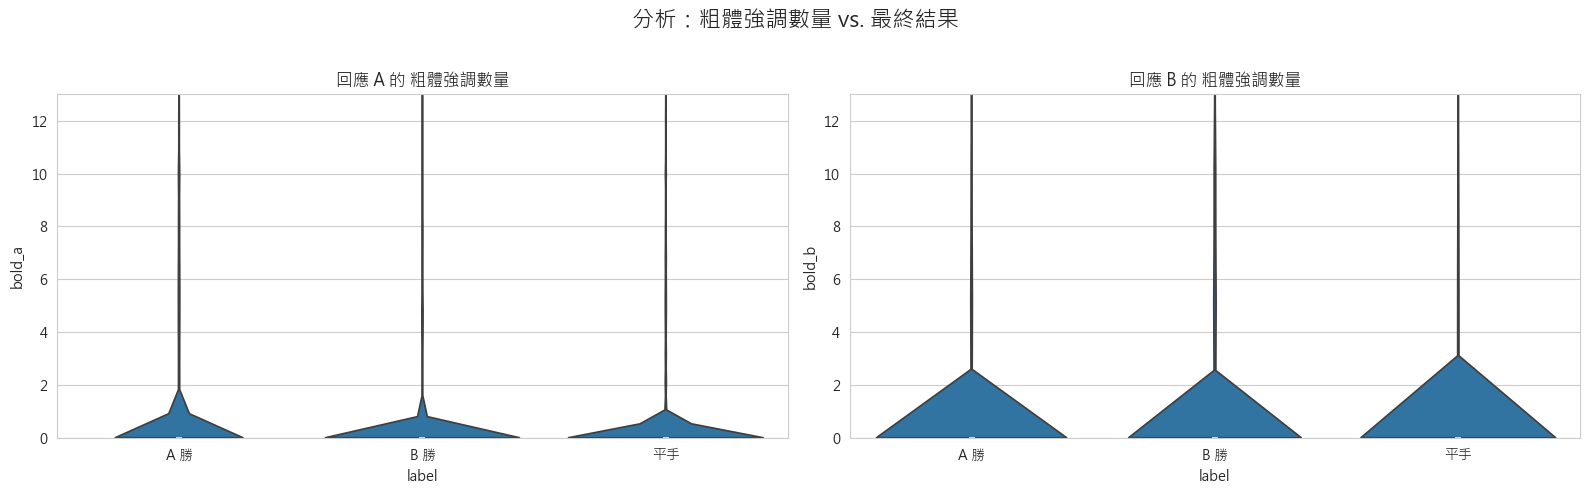

--- Êï∏Â≠óÁµ±Ë®àÔºöÁ≤óÈ´îÂº∑Ë™øÊï∏Èáè ---
Ë™™ÊòéÔºöÊÇ®‰πãÂâçÁúãÂà∞ÁöÑ„ÄéÈªûÈªû„ÄèÊòØÊï∏Êìö‰∏≠ÁöÑÈõ¢Áæ§ÂÄº(Outliers)„ÄÇ‰∏ãÈù¢ÁöÑÁµ±Ë®àË°®‰∏≠Ôºå'mean' (Âπ≥ÂùáÊï∏) ÂÆπÊòìÂèóÈõ¢Áæ§ÂÄºÂΩ±ÈüøÔºå
ËÄå '50%' (‰∏≠‰ΩçÊï∏) ÂâáÊõ¥ËÉΩ‰ª£Ë°®Êï∏ÊìöÁöÑÊôÆÈÅçÊÉÖÊ≥Å„ÄÇË´ãÈáçÈªûÊØîËºÉ‰∏çÂêå label ‰∏ãÁöÑ‰∏≠‰ΩçÊï∏Â∑ÆÁï∞„ÄÇ
        bold_a                                           bold_b                                         
         count   mean    std  min  25%  50%  75%   max    count   mean    std  min  25%  50%  75%    max
label                                                                                                   
0      20064.0  0.777  3.421  0.0  0.0  0.0  0.0  90.0  20064.0  0.457  3.568  0.0  0.0  0.0  0.0  256.0
1      19652.0  0.409  2.328  0.0  0.0  0.0  0.0  79.0  19652.0  0.764  3.781  0.0  0.0  0.0  0.0  252.0
2      17761.0  0.409  2.275  0.0  0.0  0.0  0.0  52.0  17761.0  0.461  3.401  0.0  0.0  0.0  0.0  307.0
-------------------------------------------------------------------

C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\990922716.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\990922716.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])


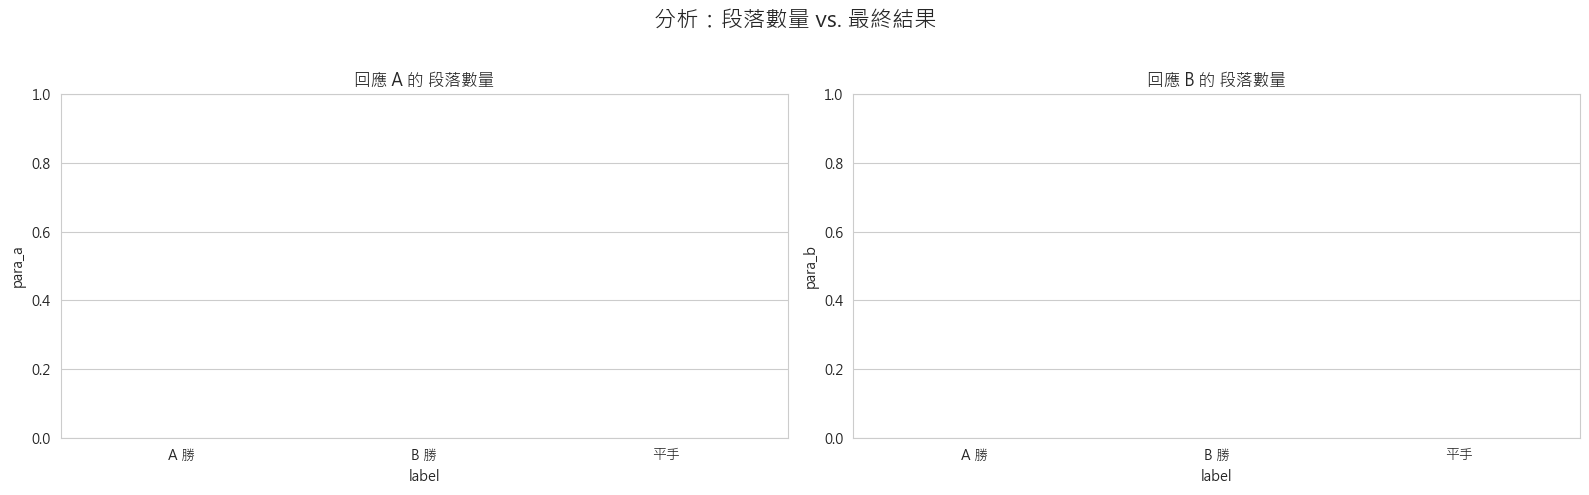

--- Êï∏Â≠óÁµ±Ë®àÔºöÊÆµËêΩÊï∏Èáè ---
Ë™™ÊòéÔºöÊÇ®‰πãÂâçÁúãÂà∞ÁöÑ„ÄéÈªûÈªû„ÄèÊòØÊï∏Êìö‰∏≠ÁöÑÈõ¢Áæ§ÂÄº(Outliers)„ÄÇ‰∏ãÈù¢ÁöÑÁµ±Ë®àË°®‰∏≠Ôºå'mean' (Âπ≥ÂùáÊï∏) ÂÆπÊòìÂèóÈõ¢Áæ§ÂÄºÂΩ±ÈüøÔºå
ËÄå '50%' (‰∏≠‰ΩçÊï∏) ÂâáÊõ¥ËÉΩ‰ª£Ë°®Êï∏ÊìöÁöÑÊôÆÈÅçÊÉÖÊ≥Å„ÄÇË´ãÈáçÈªûÊØîËºÉ‰∏çÂêå label ‰∏ãÁöÑ‰∏≠‰ΩçÊï∏Â∑ÆÁï∞„ÄÇ
        para_a                                      para_b                                   
         count mean  std  min  25%  50%  75%  max    count mean  std  min  25%  50%  75%  max
label                                                                                        
0      20064.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  20064.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
1      19652.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  19652.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2      17761.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  17761.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
--------------------------------------------------------------------------------



C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\990922716.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\990922716.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])


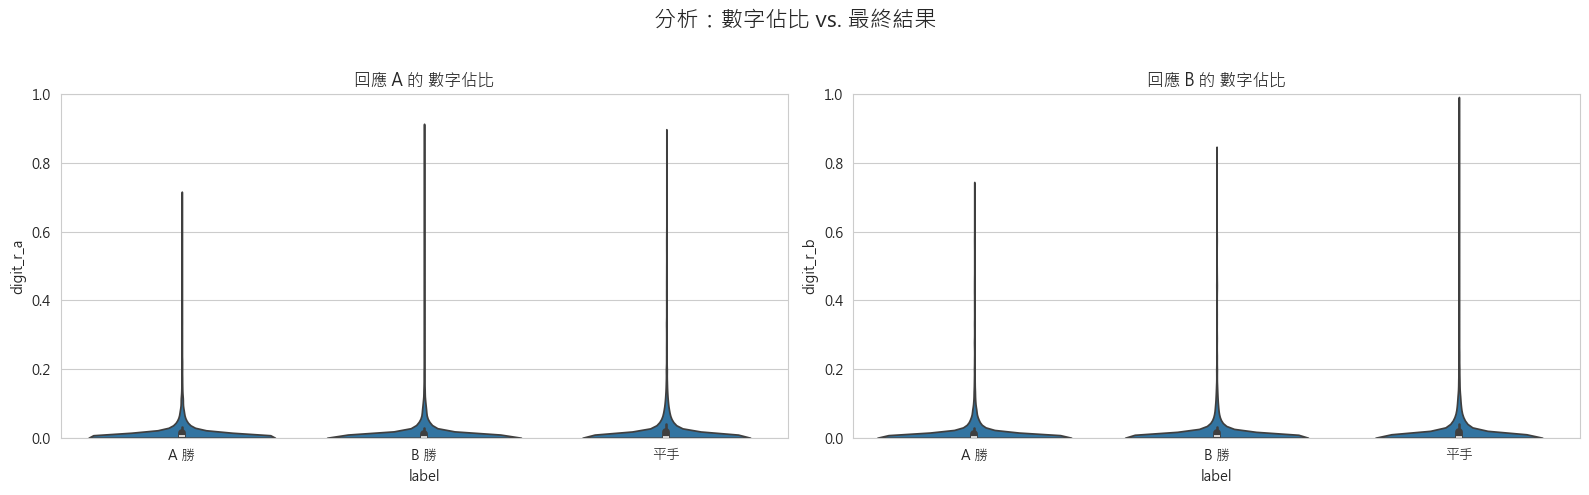

--- Êï∏Â≠óÁµ±Ë®àÔºöÊï∏Â≠ó‰ΩîÊØî ---
Ë™™ÊòéÔºöÊÇ®‰πãÂâçÁúãÂà∞ÁöÑ„ÄéÈªûÈªû„ÄèÊòØÊï∏Êìö‰∏≠ÁöÑÈõ¢Áæ§ÂÄº(Outliers)„ÄÇ‰∏ãÈù¢ÁöÑÁµ±Ë®àË°®‰∏≠Ôºå'mean' (Âπ≥ÂùáÊï∏) ÂÆπÊòìÂèóÈõ¢Áæ§ÂÄºÂΩ±ÈüøÔºå
ËÄå '50%' (‰∏≠‰ΩçÊï∏) ÂâáÊõ¥ËÉΩ‰ª£Ë°®Êï∏ÊìöÁöÑÊôÆÈÅçÊÉÖÊ≥Å„ÄÇË´ãÈáçÈªûÊØîËºÉ‰∏çÂêå label ‰∏ãÁöÑ‰∏≠‰ΩçÊï∏Â∑ÆÁï∞„ÄÇ
      digit_r_a                                              digit_r_b                                             
          count   mean    std  min  25%    50%    75%    max     count   mean    std  min  25%    50%    75%    max
label                                                                                                              
0       20064.0  0.019  0.058  0.0  0.0  0.004  0.013  0.717   20064.0  0.018  0.058  0.0  0.0  0.003  0.012  0.745
1       19652.0  0.018  0.057  0.0  0.0  0.003  0.012  0.914   19652.0  0.019  0.059  0.0  0.0  0.004  0.013  0.847
2       17761.0  0.022  0.062  0.0  0.0  0.003  0.016  0.898   17761.0  0.023  0.063  0.0  0.0  0.003  0.016  0.992
-------

C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\990922716.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
C:\Users\asas1\AppData\Local\Temp\ipykernel_17036\990922716.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])


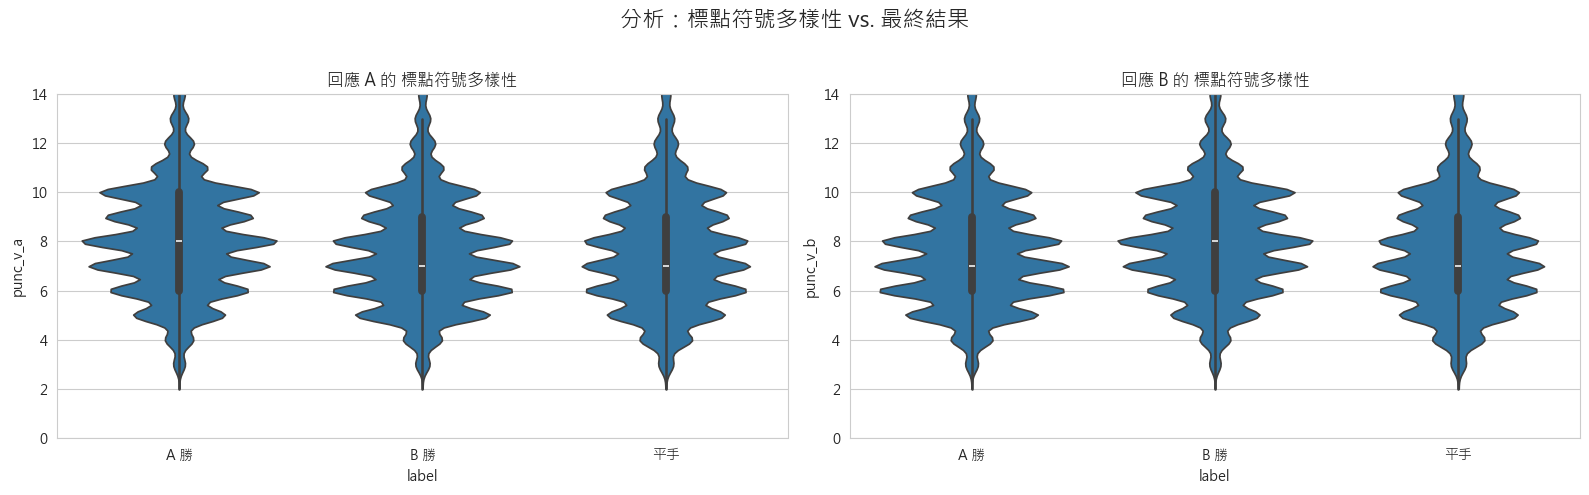

--- Êï∏Â≠óÁµ±Ë®àÔºöÊ®ôÈªûÁ¨¶ËôüÂ§öÊ®£ÊÄß ---
Ë™™ÊòéÔºöÊÇ®‰πãÂâçÁúãÂà∞ÁöÑ„ÄéÈªûÈªû„ÄèÊòØÊï∏Êìö‰∏≠ÁöÑÈõ¢Áæ§ÂÄº(Outliers)„ÄÇ‰∏ãÈù¢ÁöÑÁµ±Ë®àË°®‰∏≠Ôºå'mean' (Âπ≥ÂùáÊï∏) ÂÆπÊòìÂèóÈõ¢Áæ§ÂÄºÂΩ±ÈüøÔºå
ËÄå '50%' (‰∏≠‰ΩçÊï∏) ÂâáÊõ¥ËÉΩ‰ª£Ë°®Êï∏ÊìöÁöÑÊôÆÈÅçÊÉÖÊ≥Å„ÄÇË´ãÈáçÈªûÊØîËºÉ‰∏çÂêå label ‰∏ãÁöÑ‰∏≠‰ΩçÊï∏Â∑ÆÁï∞„ÄÇ
      punc_v_a                                          punc_v_b                                         
         count   mean    std  min  25%  50%   75%   max    count   mean    std  min  25%  50%   75%   max
label                                                                                                    
0      20064.0  8.026  2.178  2.0  6.0  8.0  10.0  15.0  20064.0  7.573  2.160  2.0  6.0  7.0   9.0  15.0
1      19652.0  7.564  2.170  2.0  6.0  7.0   9.0  15.0  19652.0  8.030  2.184  2.0  6.0  8.0  10.0  15.0
2      17761.0  7.617  2.251  2.0  6.0  7.0   9.0  15.0  17761.0  7.630  2.271  2.0  6.0  7.0   9.0  15.0
----------------------------------------------------------

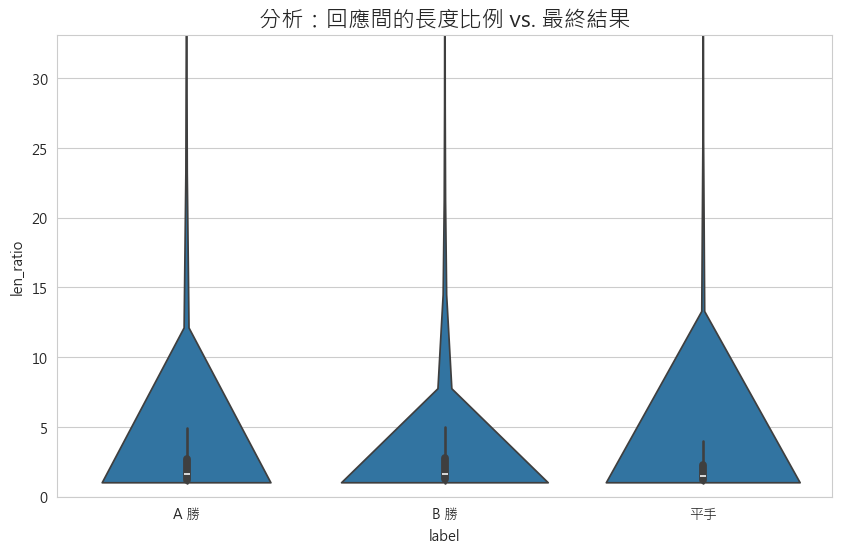

--- Êï∏Â≠óÁµ±Ë®àÔºöÂõûÊáâÈñìÁöÑÈï∑Â∫¶ÊØî‰æã ---
      len_ratio                                                  
          count   mean     std  min    25%    50%    75%      max
label                                                            
0       20064.0  3.661  14.633  1.0  1.234  1.636  2.708  1099.75
1       19652.0  3.581  11.021  1.0  1.239  1.646  2.745   668.25
2       17761.0  3.077  12.892  1.0  1.171  1.468  2.290  1216.50
--------------------------------------------------------------------------------



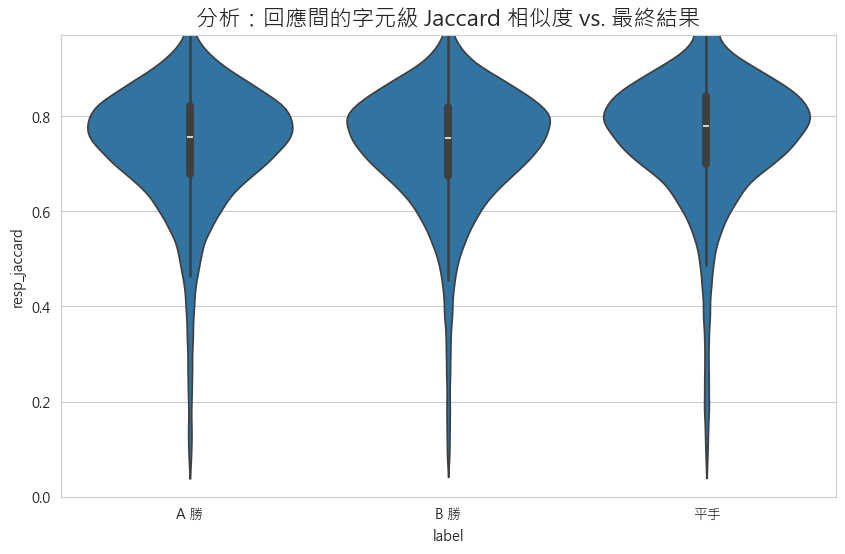

--- Êï∏Â≠óÁµ±Ë®àÔºöÂõûÊáâÈñìÁöÑÂ≠óÂÖÉÁ¥ö Jaccard Áõ∏‰ººÂ∫¶ ---
      resp_jaccard                                               
             count   mean    std    min    25%    50%    75%  max
label                                                            
0          20064.0  0.734  0.132  0.038  0.677  0.756  0.821  1.0
1          19652.0  0.733  0.130  0.042  0.673  0.754  0.820  1.0
2          17761.0  0.756  0.135  0.039  0.700  0.778  0.842  1.0
--------------------------------------------------------------------------------


--- ÈÄ≤ÈöéÁâπÂæµÊé¢Á¥¢ÂÆåÁï¢ ---


In [5]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

# --- ÂÆâÂÖ®ÊÄßÊ™¢Êü•ÔºöÁ¢∫‰øù df Âíå label Ê¨Ñ‰ΩçÂ≠òÂú® ---
if 'df' not in locals() or df.empty:
    print("DataFrame 'df' ‰∏çÂ≠òÂú®ÊàñÁÇ∫Á©∫ÔºåÊ≠£Âú®ÈáçÊñ∞ËºâÂÖ•...")
    try:
        df = pd.read_parquet('train_with_language.parquet')
    except FileNotFoundError:
        df = pd.read_csv('train.csv')

if 'label' not in df.columns:
    print("'label' Ê¨Ñ‰Ωç‰∏çÂ≠òÂú®ÔºåÊ≠£Âú®ÁÇ∫ÊÇ®ÂâµÂª∫...")
    def get_label(row):
        if row['winner_model_a'] == 1: return 0
        if row['winner_model_b'] == 1: return 1
        return 2
    df['label'] = df.apply(get_label, axis=1)
    print("'label' Ê¨Ñ‰ΩçÂâµÂª∫ÊàêÂäüÔºÅ")

# --- È†êÂÖàË®àÁÆóÊâÄÊúâÈúÄË¶ÅÁöÑÁâπÂæµÔºåÈÅøÂÖçÈáçË§áË®àÁÆó ---
# (ÈÄôÈÉ®ÂàÜËàá‰∏äÊ¨°Áõ∏ÂêåÔºåÂ¶ÇÊûúÂ∑≤Ë®àÁÆóÈÅéÔºåÂèØ‰ª•Ë®ªËß£Êéâ‰ª•ÁØÄÁúÅÊôÇÈñì)
print("\n--- Ê™¢Êü•‰∏¶Ë®àÁÆóÊâÄÊúâÈúÄË¶ÅÁöÑÁâπÂæµ ---")

# Á∂≠Â∫¶‰∏Ä & ‰∫åÁöÑÂáΩÂºè
def count_list_items(text): return len(re.findall(r'^\s*[\*\-]\s|\n\s*[\*\-]\s|^\s*\d+\.\s|\n\s*\d+\.\s', str(text), re.MULTILINE))
def count_bold_emphasis(text): return len(re.findall(r'\*\*(.*?)\*\*|__(.*?)__', str(text)))
def count_paragraphs(text): return len(re.split(r'\n\s*\n', str(text).strip()))
def digit_ratio(text):
    text = str(text)
    if not text: return 0
    return len(re.findall(r'\d', text)) / len(text)
def punctuation_variety(text): return len(set(re.findall(r'[.,!?;:(){}\[\]\'\"-]', str(text))))

# Á∂≠Â∫¶‰∏âÁöÑÂáΩÂºè
def calculate_length_ratio(len_a, len_b):
    if min(len_a, len_b) == 0: return 1
    return max(len_a, len_b) / min(len_a, len_b)
def get_char_jaccard_similarity(text1, text2):
    set1, set2 = set(str(text1)), set(str(text2))
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# ÊáâÁî®Ë®àÁÆó
features_to_calc = {'list': count_list_items, 'bold': count_bold_emphasis, 'para': count_paragraphs, 'digit_r': digit_ratio, 'punc_v': punctuation_variety}
for name, func in features_to_calc.items():
    if f'{name}_a' not in df.columns:
        print(f"Ê≠£Âú®Ë®àÁÆóÁâπÂæµ: {name}...")
        tqdm.pandas(desc=f"Ë®àÁÆó {name}_a")
        df[f'{name}_a'] = df['response_a'].progress_apply(func)
        tqdm.pandas(desc=f"Ë®àÁÆó {name}_b")
        df[f'{name}_b'] = df['response_b'].progress_apply(func)

if 'len_ratio' not in df.columns:
    print("Ê≠£Âú®Ë®àÁÆó‰∫íÂãïÁâπÂæµ...")
    if 'len_a' not in df.columns: df['len_a'] = df['response_a'].str.len()
    if 'len_b' not in df.columns: df['len_b'] = df['response_b'].str.len()
    df['len_ratio'] = df.apply(lambda row: calculate_length_ratio(row['len_a'], row['len_b']), axis=1)
    df['resp_jaccard'] = df.apply(lambda row: get_char_jaccard_similarity(row['response_a'], row['response_b']), axis=1)

print("\n--- ÊâÄÊúâÁâπÂæµÂ∑≤Ê∫ñÂÇôÂ∞±Á∑íÔºåÈñãÂßãÂàÜÊûêËàáË¶ñË¶∫Âåñ ---")

# ==============================================================================
#  Ë¶ñË¶∫ÂåñÂàÜÊûêËàáÊï∏Â≠óÁµ±Ë®à
# ==============================================================================

# --- ÂàÜÊûêÁ∂≠Â∫¶‰∏Ä & ‰∫åÁöÑÁâπÂæµ (A/B Â∞çÊØî) ---
features_to_plot_ab = {
    'list': 'ÂàóË°®È†ÖÁõÆÊï∏Èáè',
    'bold': 'Á≤óÈ´îÂº∑Ë™øÊï∏Èáè',
    'para': 'ÊÆµËêΩÊï∏Èáè',
    'digit_r': 'Êï∏Â≠ó‰ΩîÊØî',
    'punc_v': 'Ê®ôÈªûÁ¨¶ËôüÂ§öÊ®£ÊÄß'
}

for key, name in features_to_plot_ab.items():
    # 1. Áπ™Ë£ΩÂÑ™ÂåñÂæåÁöÑÂúñË°®
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle(f'ÂàÜÊûêÔºö{name} vs. ÊúÄÁµÇÁµêÊûú', fontsize=16)

    # ÊîπÁî®Â∞èÊèêÁê¥Âúñ (Violin Plot) ‰æÜÊõ¥Ê∏ÖÊô∞Âú∞Â±ïÁ§∫ÂàÜ‰Ωà
    sns.violinplot(x='label', y=f'{key}_a', data=df, ax=axes[0], cut=0)
    axes[0].set_title(f'ÂõûÊáâ A ÁöÑ {name}')
    axes[0].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
    axes[0].set_ylim(0, max(1, df[f'{key}_a'].quantile(0.99))) # Á∏ÆÊîæ Y Ëª∏‰ª•ËßÄÂØü‰∏ªË¶ÅÂàÜ‰Ωà

    sns.violinplot(x='label', y=f'{key}_b', data=df, ax=axes[1], cut=0)
    axes[1].set_title(f'ÂõûÊáâ B ÁöÑ {name}')
    axes[1].set_xticklabels(['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
    axes[1].set_ylim(0, max(1, df[f'{key}_b'].quantile(0.99)))

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # 2. ÈôÑ‰∏äÁ≤æÁ¢∫ÁöÑÊï∏Â≠óÁµ±Ë®à
    print(f"--- Êï∏Â≠óÁµ±Ë®àÔºö{name} ---")
    print("Ë™™ÊòéÔºöÊÇ®‰πãÂâçÁúãÂà∞ÁöÑ„ÄéÈªûÈªû„ÄèÊòØÊï∏Êìö‰∏≠ÁöÑÈõ¢Áæ§ÂÄº(Outliers)„ÄÇ‰∏ãÈù¢ÁöÑÁµ±Ë®àË°®‰∏≠Ôºå'mean' (Âπ≥ÂùáÊï∏) ÂÆπÊòìÂèóÈõ¢Áæ§ÂÄºÂΩ±ÈüøÔºå")
    print("ËÄå '50%' (‰∏≠‰ΩçÊï∏) ÂâáÊõ¥ËÉΩ‰ª£Ë°®Êï∏ÊìöÁöÑÊôÆÈÅçÊÉÖÊ≥Å„ÄÇË´ãÈáçÈªûÊØîËºÉ‰∏çÂêå label ‰∏ãÁöÑ‰∏≠‰ΩçÊï∏Â∑ÆÁï∞„ÄÇ")
    # ‰ΩøÁî® .describe() Êèê‰æõÂÆåÊï¥ÁöÑÁµ±Ë®àÊï∏Êìö
    print(df.groupby('label')[[f'{key}_a', f'{key}_b']].describe().round(3))
    print("-" * 80 + "\n")


# --- ÂàÜÊûêÁ∂≠Â∫¶‰∏âÁöÑÁâπÂæµ (‰∫íÂãïÁâπÂæµ) ---
features_to_plot_single = {
    'len_ratio': 'ÂõûÊáâÈñìÁöÑÈï∑Â∫¶ÊØî‰æã',
    'resp_jaccard': 'ÂõûÊáâÈñìÁöÑÂ≠óÂÖÉÁ¥ö Jaccard Áõ∏‰ººÂ∫¶'
}

for key, name in features_to_plot_single.items():
    # 1. Áπ™Ë£ΩÂÑ™ÂåñÂæåÁöÑÂúñË°®
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='label', y=key, data=df, cut=0)
    plt.title(f'ÂàÜÊûêÔºö{name} vs. ÊúÄÁµÇÁµêÊûú', fontsize=16)
    plt.xticks(ticks=[0, 1, 2], labels=['A Âãù', 'B Âãù', 'Âπ≥Êâã'])
    plt.ylim(0, df[key].quantile(0.99))
    plt.show()

    # 2. ÈôÑ‰∏äÁ≤æÁ¢∫ÁöÑÊï∏Â≠óÁµ±Ë®à
    print(f"--- Êï∏Â≠óÁµ±Ë®àÔºö{name} ---")
    print(df.groupby('label')[[key]].describe().round(3))
    print("-" * 80 + "\n")

print("\n--- ÈÄ≤ÈöéÁâπÂæµÊé¢Á¥¢ÂÆåÁï¢ ---")

# Ë™øÊü•tokenÊï∏Èáè

--- ÈñãÂßãÂàÜÊûêÊúÄÁµÇËº∏ÂÖ•ÊñáÊú¨ÁöÑ‰º∞Ë®à Token Èï∑Â∫¶ ---


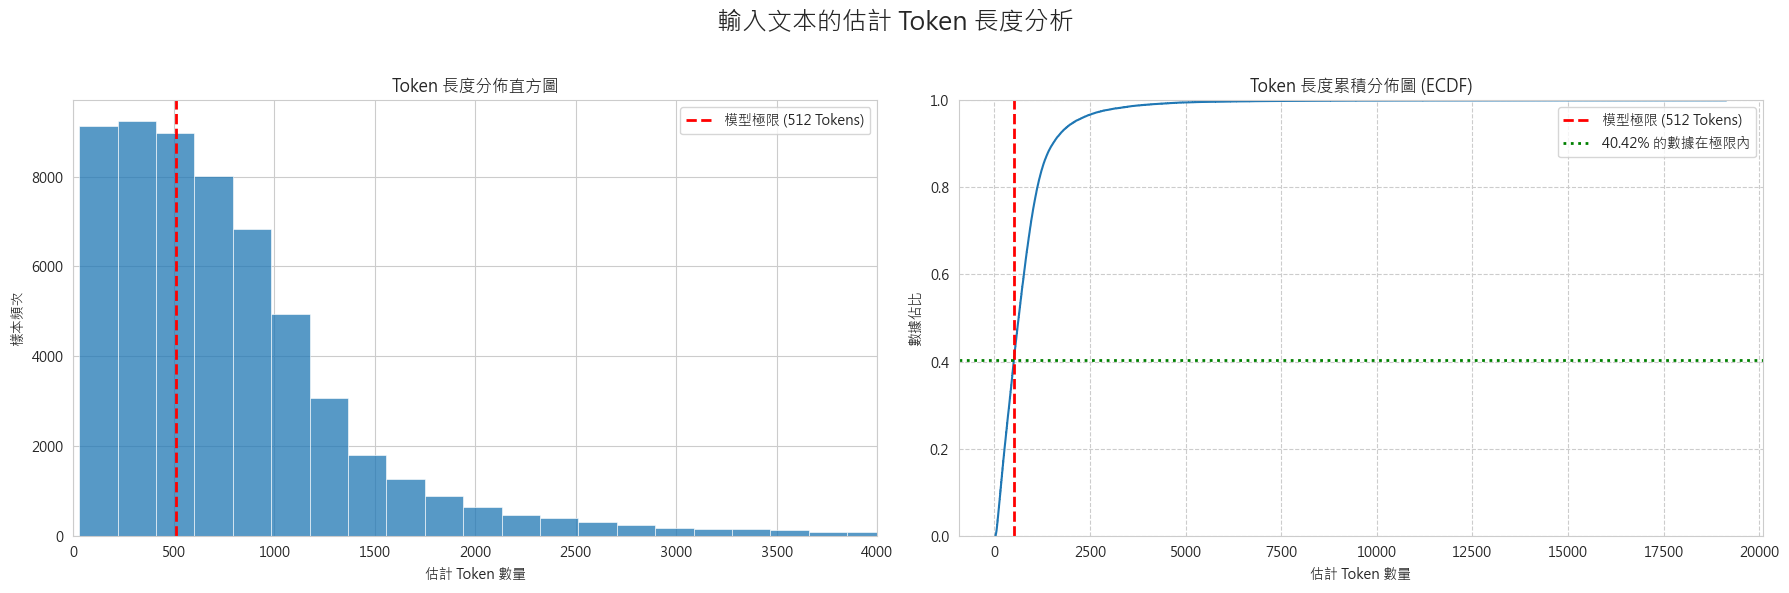


--- Á≤æÁ¢∫Êï∏Â≠óÁµ±Ë®à ---
Ê®°Âûã Token ‰∏äÈôê: 512
count    57477.00
mean       805.67
std        808.11
min         28.75
25%        326.75
50%        634.25
75%       1014.25
max      19139.75
Name: estimated_tokens, dtype: float64
----------------------------------------
‰º∞Ë®àÊúÉË∂ÖÂá∫Èï∑Â∫¶ÈôêÂà∂ÁöÑÊ®£Êú¨Êï∏Èáè: 34243 / 57477
‰º∞Ë®àÊúÉË¢´Êà™Êñ∑ÁöÑÊï∏Êìö‰ΩîÊØî: 59.58%
----------------------------------------

‚ö†Ô∏è Ë≠¶ÂëäÔºöÊúâË∂ÖÈÅé 10% ÁöÑÊï∏ÊìöÂèØËÉΩÊúÉË¢´Êà™Êñ∑ÔºÅÈÄôÂèØËÉΩÊúÉÂö¥ÈáçÂΩ±ÈüøÊ®°ÂûãÊÄßËÉΩ„ÄÇ
Âª∫Ë≠∞Êé™ÊñΩÔºöÂú®È†êËôïÁêÜÊôÇÔºåËÄÉÊÖÆÂ∞ç prompt Êàñ response ÈÄ≤Ë°åÊõ¥Á©çÊ•µÁöÑË£ÅÂàáÔºåÁÇ∫ÂÖÉÊï∏Êìö‰øùÁïôÁ©∫Èñì„ÄÇ


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- ÂÆâÂÖ®ÊÄßÊ™¢Êü•ÔºöÁ¢∫‰øù df ÂíåÊàëÂÄëÈúÄË¶ÅÁöÑÁâπÂæµÂ≠òÂú® ---
# ÈÄôË£°ÂÅáË®≠ df Â∑≤Á∂ìË¢´ËºâÂÖ•Ôºå‰∏¶‰∏î 'label' Ê¨Ñ‰ΩçÂ∑≤ÂâµÂª∫
# ÊàëÂÄëÈÇÑÈúÄË¶Å 'punc_v_a', 'punc_v_b', 'len_ratio', 'resp_jaccard'
# Â¶ÇÊûúÈÄô‰∫õÁâπÂæµ‰∏çÂ≠òÂú®ÔºåÈÄôÂÄã cell ÊúÉË∑≥ÈÅéÂü∑Ë°å‰∏¶ÊèêÁ§∫
required_features = ['prompt', 'response_a', 'response_b', 'punc_v_a', 'punc_v_b', 'len_ratio', 'resp_jaccard']
if 'df' not in locals() or not all(col in df.columns for col in required_features):
    print("ÈåØË™§Ôºö'df' ÊàñÂøÖË¶ÅÁöÑÁâπÂæµÊ¨Ñ‰Ωç‰∏çÂ≠òÂú®„ÄÇË´ãÂÖàÂü∑Ë°å‰πãÂâçÁöÑÁâπÂæµË®àÁÆó CELL„ÄÇ")
    print(f"Áº∫Â§±ÁöÑÊ¨Ñ‰Ωç: {[col for col in required_features if col not in df.columns]}")
else:
    print("--- ÈñãÂßãÂàÜÊûêÊúÄÁµÇËº∏ÂÖ•ÊñáÊú¨ÁöÑ‰º∞Ë®à Token Èï∑Â∫¶ ---")

    # --- 1. Ê®°Êì¨ÊúÄÁµÇËº∏ÂÖ•ÊñáÊú¨ÁöÑÊßãÂª∫ÈÅéÁ®ã ---
    def build_final_input_text(row):
        """
        Ê®°Êì¨Ê®°ÂûãÊé•Êî∂Âà∞ÁöÑÊúÄÁµÇËº∏ÂÖ•ÊñáÊú¨Ê†ºÂºè„ÄÇ
        """
        # Âü∫Á§éÊñáÊú¨ÈÉ®ÂàÜ
        prompt = str(row['prompt'])
        response_a = str(row['response_a'])
        response_b = str(row['response_b'])
        
        # ÊàëÂÄëÈÅ∏ÂÆöÁöÑÂÖÉÊï∏ÊìöÁâπÂæµ
        # ÈÄôË£°ÊàëÂÄëÂ∞áÊï∏Â≠óÊ†ºÂºèÂåñÔºå‰ª•Ê®°Êì¨ÂÆÉÂÄëËÆäÊàêÂ≠ó‰∏≤ÂæåÁöÑÈï∑Â∫¶
        punc_v_a = row['punc_v_a']
        punc_v_b = row['punc_v_b']
        len_ratio = row['len_ratio']
        resp_jaccard = row['resp_jaccard']

        metadata_str = (
            f"[METADATA] "
            f"punc_v_a:{punc_v_a}, punc_v_b:{punc_v_b}, "
            f"len_ratio:{len_ratio:.2f}, resp_jaccard:{resp_jaccard:.2f}"
        )
        
        # ÁµÑÂêàÊâÄÊúâÈÉ®ÂàÜÔºå‰∏¶Áî® [SEP] ÂàÜÈöî
        final_text = (
            f"{prompt} [SEP] {response_a} [SEP] {response_b} [SEP] {metadata_str}"
        )
        return final_text

    # ÊáâÁî®ÂáΩÂºè‰æÜÂâµÂª∫ÂåÖÂê´ÊâÄÊúâË≥áË®äÁöÑÊúÄÁµÇÊñáÊú¨
    df['final_text'] = df.apply(build_final_input_text, axis=1)

    # --- 2. Ë®àÁÆó‰º∞Ë®àÁöÑ Token Èï∑Â∫¶ ---
    # Á∂ìÈ©óÊ≥ïÂâáÔºö1 Token ‚âà 4 Â≠óÂÖÉ
    TOKEN_PER_CHAR = 4 
    df['estimated_tokens'] = df['final_text'].str.len() / TOKEN_PER_CHAR
    
    # --- 3. Ë¶ñË¶∫ÂåñÂàÜÊûê ---
    MODEL_TOKEN_LIMIT = 512

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle('Ëº∏ÂÖ•ÊñáÊú¨ÁöÑ‰º∞Ë®à Token Èï∑Â∫¶ÂàÜÊûê', fontsize=18)

    # Â∑¶ÂúñÔºöÁõ¥ÊñπÂúñ (Histogram)
    sns.histplot(df['estimated_tokens'], bins=100, ax=axes[0])
    axes[0].set_title('Token Èï∑Â∫¶ÂàÜ‰ΩàÁõ¥ÊñπÂúñ')
    axes[0].set_xlabel('‰º∞Ë®à Token Êï∏Èáè')
    axes[0].set_ylabel('Ê®£Êú¨È†ªÊ¨°')
    axes[0].axvline(x=MODEL_TOKEN_LIMIT, color='r', linestyle='--', linewidth=2, label=f'Ê®°ÂûãÊ•µÈôê ({MODEL_TOKEN_LIMIT} Tokens)')
    axes[0].legend()
    # ÁÇ∫‰∫ÜÁúãÊ∏Ö‰∏ªË¶ÅÂàÜ‰ΩàÔºåÂèØ‰ª•ÈôêÂà∂ x Ëª∏ÁØÑÂúç
    axes[0].set_xlim(0, df['estimated_tokens'].quantile(0.99))

    # Âè≥ÂúñÔºöÁ¥ØÁ©çÂàÜ‰ΩàÂúñ (ECDF Plot)
    sns.ecdfplot(data=df, x='estimated_tokens', ax=axes[1])
    axes[1].set_title('Token Èï∑Â∫¶Á¥ØÁ©çÂàÜ‰ΩàÂúñ (ECDF)')
    axes[1].set_xlabel('‰º∞Ë®à Token Êï∏Èáè')
    axes[1].set_ylabel('Êï∏Êìö‰ΩîÊØî')
    axes[1].grid(True, which="both", ls="--")
    # Ê®ôÂá∫Ê®°ÂûãÊ•µÈôêÁ∑ö
    axes[1].axvline(x=MODEL_TOKEN_LIMIT, color='r', linestyle='--', linewidth=2, label=f'Ê®°ÂûãÊ•µÈôê ({MODEL_TOKEN_LIMIT} Tokens)')
    
    # Âú®Ê•µÈôêÁ∑öÂ∞çÊáâÁöÑ Y Ëª∏‰∏äÊ®ôÂá∫Ë¢´Êà™Êñ∑ÁöÑÊØî‰æã
    try:
        # Ë®àÁÆóÂú®Ê•µÈôêÂÄºÊôÇÔºåY Ëª∏Â∞çÊáâÁöÑÁôæÂàÜÊØî
        percentile_at_limit = df[df['estimated_tokens'] <= MODEL_TOKEN_LIMIT].shape[0] / len(df)
        axes[1].axhline(y=percentile_at_limit, color='g', linestyle=':', linewidth=2, label=f'{percentile_at_limit:.2%} ÁöÑÊï∏ÊìöÂú®Ê•µÈôêÂÖß')
    except Exception as e:
        print(f"ÁÑ°Ê≥ïË®àÁÆóÁôæÂàÜ‰ΩçÊï∏: {e}")
        
    axes[1].legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- 4. Êèê‰æõÁ≤æÁ¢∫ÁöÑÊï∏Â≠óÁµ±Ë®à ---
    exceeding_count = df[df['estimated_tokens'] > MODEL_TOKEN_LIMIT].shape[0]
    exceeding_percentage = (exceeding_count / len(df)) * 100

    print("\n--- Á≤æÁ¢∫Êï∏Â≠óÁµ±Ë®à ---")
    print(f"Ê®°Âûã Token ‰∏äÈôê: {MODEL_TOKEN_LIMIT}")
    print(df['estimated_tokens'].describe().round(2))
    print("-" * 40)
    print(f"‰º∞Ë®àÊúÉË∂ÖÂá∫Èï∑Â∫¶ÈôêÂà∂ÁöÑÊ®£Êú¨Êï∏Èáè: {exceeding_count} / {len(df)}")
    print(f"‰º∞Ë®àÊúÉË¢´Êà™Êñ∑ÁöÑÊï∏Êìö‰ΩîÊØî: {exceeding_percentage:.2f}%")
    print("-" * 40)

    if exceeding_percentage > 10:
        print("\n‚ö†Ô∏è Ë≠¶ÂëäÔºöÊúâË∂ÖÈÅé 10% ÁöÑÊï∏ÊìöÂèØËÉΩÊúÉË¢´Êà™Êñ∑ÔºÅÈÄôÂèØËÉΩÊúÉÂö¥ÈáçÂΩ±ÈüøÊ®°ÂûãÊÄßËÉΩ„ÄÇ")
        print("Âª∫Ë≠∞Êé™ÊñΩÔºöÂú®È†êËôïÁêÜÊôÇÔºåËÄÉÊÖÆÂ∞ç prompt Êàñ response ÈÄ≤Ë°åÊõ¥Á©çÊ•µÁöÑË£ÅÂàáÔºåÁÇ∫ÂÖÉÊï∏Êìö‰øùÁïôÁ©∫Èñì„ÄÇ")
    elif exceeding_percentage > 1:
        print("\n‚úÖ ÁµêË´ñÔºöÂ§ßÈÉ®ÂàÜÊï∏ÊìöÈÉΩÂú®Èï∑Â∫¶ÈôêÂà∂ÂÖß„ÄÇÂ∞ëÈáèÁöÑÊà™Êñ∑ÊòØÊ≠£Â∏∏ÁöÑÔºåÁõÆÂâçÁöÑËº∏ÂÖ•Ê†ºÂºèÊòØÂèØÊé•ÂèóÁöÑ„ÄÇ")
    else:
        print("\nüéâ ÂÑ™ÁßÄÔºÅÂπæ‰πéÊâÄÊúâÊï∏ÊìöÈÉΩÂú®Èï∑Â∫¶ÈôêÂà∂ÂÖßÔºåÁÑ°ÈúÄÊìîÂøÉÊà™Êñ∑ÂïèÈ°å„ÄÇ")

# ÈÄ≤ÈöéË≥áÊñô